In [1]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt
import seaborn as sns


def sigmoid(x):
    """ Sigmoid activation function for an array of neuron outputs.
    Args:
      x: Array/single element of neuron outputs before activation 
    Returns: 
      An array the same length as x with the sigmoid activation applied. 
    """
    return 1/(1+np.exp(-x))


def dsigmoid(y):
    """ Derivative of the sigmoid activation function with respect to the input x of the activation.
      Args: 
        y: Array/single element of neuron outputs after activation 
      Returns: 
        An array the same length as y representing the derivative with respect to x
    """
    return y*(1-y)


def mse(y, pred):
    """Mean squared error function comparing real target values with predictions.
    Args:
      y: List containing real target values 
      pred: List containing predicted target values (must have the same shape as y)
    Returns:
      Mean squared error between the two arrays
    """
    return np.mean(np.square(y - pred))


In [2]:
dlist = []
y = []
count = 0
with open('ppdata.csv', 'r', encoding='utf-8') as r:
    count = 0
    for l in r:
        if count > 0:
            l = l.split(',')
            val = l[0]
            wds = l[1]
            wrds = wds.split(' ')
            dlist.append(wrds)
            y.append([np.asarray(int(val), dtype=np.int32)])
            count += 1
        else:
            count += 1

            
y = np.array(y)

max_words = 12000
max_len = 200

#using keras tokenizer to encode input
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dlist)
sequences = tokenizer.texts_to_sequences(dlist)
x = pad_sequences(sequences, maxlen=max_len)
x = x.astype(np.float32)

Using TensorFlow backend.


In [3]:
shuffle_ind = np.random.permutation(len(x))  # shuffle data for training
x = np.array(x[shuffle_ind])

x /= np.max(x)  # linearly scaling the inputs to a range between 0 and 1

train_fraction = 0.75
train_idx = int(len(x)*train_fraction)

x_train = x[:train_idx]
y_train = y[:train_idx]

x_val = x[train_idx:]
y_val = y[train_idx:]

Epoch: 0, Training Loss: 0.30118793324163584, Validation Acc: 0.49928
Epoch: 100, Training Loss: 0.49976127420158084, Validation Acc: 0.49928
Epoch: 200, Training Loss: 0.4997612445165848, Validation Acc: 0.49928
Epoch: 300, Training Loss: 0.49976121449509703, Validation Acc: 0.49928
Epoch: 400, Training Loss: 0.49976118412360027, Validation Acc: 0.49928
Validation loss: 0.5007027022313508
Validation accuracy: 0.49928


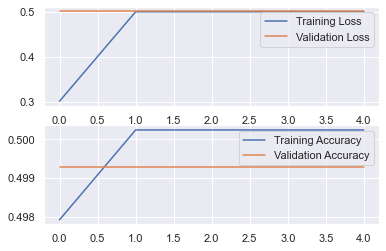

In [4]:
# Training a single layer neural network.
# initialize single layer weights randomly with mean 0: single neuron in layer
W = 2*np.random.random((np.array(x).shape[1], 1)) - 1

lr = 0.5  
history = {"loss": [], "val_loss": [], "acc": [],
           "val_acc": []}  # Metrics to track while training

epochs = 500

for iter in range(epochs):
    # forward propagation
    l0 = x_train  # layer 0 output
    l1 = sigmoid(np.matmul(l0, W))  # layer 1 output

    l1_error = l1 - y_train  # Output layer error, (dE/do)

    l1_gradient = dsigmoid(l1)  # (do/dnetx)

    # (dE/do * do/dnetx = dE/dnetx)
    l1_delta = np.multiply(l1_error, l1_gradient)

    # (dnetx/dwij * dE/dnetx = dE/dwij)
    l1_weight_delta = np.matmul(l0.T, l1_delta)

    # update weights with a scaling factor of learning rate
    W -= l1_weight_delta * lr

    if iter % 100 == 0:
        # Recording metrics
        train_loss = mse(y_train, l1)
        train_acc = np.sum(y_train == np.around(l1))/len(x_train)
        history["loss"].append(train_loss)
        history["acc"].append(train_acc)

        val_pred = sigmoid(np.dot(x_val, W))
        val_loss = mse(y_val, val_pred)
        val_acc = np.sum(y_val == np.around(val_pred))/len(x_val)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        print('Epoch: {}, Training Loss: {}, Validation Acc: {}'.format(
            iter, train_loss, val_acc))

val_pred = sigmoid(np.dot(x_val, W))
print("Validation loss: {}".format(mse(y_val, val_pred)))
print("Validation accuracy: {}".format(
    np.sum(y_val == np.around(val_pred))/len(x_val)))

# Plotting
sns.set()
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history['loss'], label="Training Loss")
plt.plot(history['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history['acc'], label="Training Accuracy")
plt.plot(history['val_acc'], label="Validation Accuracy")
plt.legend()

plt.show()